<a href="https://colab.research.google.com/github/funteck123/hello-world/blob/main/WIA1007_GroupAssignment_Group18Funteck_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Funteck's CarCash AI - Your Old Car Selling Price Predictor : Machine Learning Model CLI User Interface



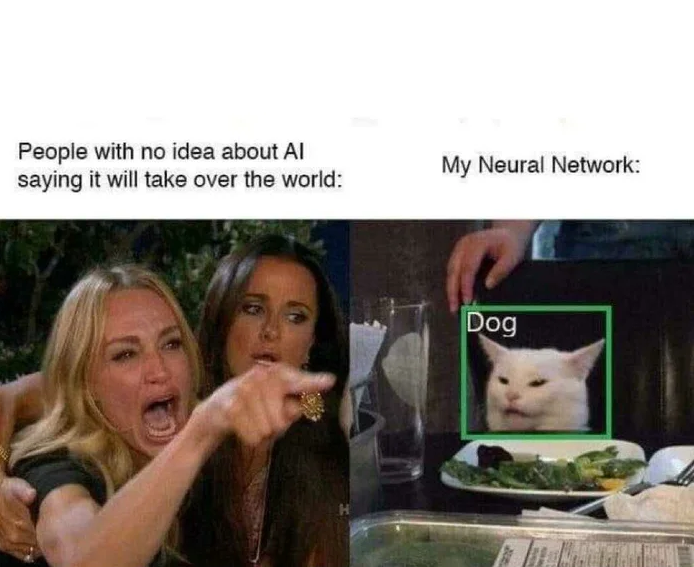

# 0. Introduction







In our project, we're diving into the Indian used car market using a Kaggle dataset available [here](https://www.kaggle.com/datasets/milanvaddoriya/old-car-price-prediction). Our mission? To predict car prices for the top selling cars in the used indian market based on features like car_name, car_prices_in_rupee, kms_driven, fuel_type, transmission, ownership, manufacture, engine, and Seats. We'll follow these steps:

1. **Data Loading and Cleaning:**
   - We'll start by getting the data and making sure it's tidy and ready for analysis. This step ensures we're working with good, reliable information.

2. **Exploratory Data Analysis (EDA):**
   - Next up, we'll dig into the dataset, exploring patterns and relationships among the features. It's like detective work to find valuable clues hidden in the data.

3. **Algorithm Training & Testing (Regression):**
   - We'll use a technique called linear regression to train our model. This is where the magic happens – the model learns from the data to make predictions about car prices.

4. **Model Evaluation:**
   - We'll check how well our base model is doing.

5. **Experiments:**
   - We will try several ways to improve our model's performance.

6. **Conclusion:**
   - Summarising the key points.

7. **Funteck's CarCash AI - CLI User Interface:**
   - Lastly, we let you interact with our machine learning model and test its performance.


Join us on this journey of predicting car prices in the Indian market – step by step, we're turning data into insights!

# 1. Loading Dataset & Getting a Quick Look

In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import joblib

The code is part of the initial exploration and understanding of the dataset before proceeding with any further analysis or machine learning tasks.

In [ ]:
# Loading Dataset
df = pd.read_csv("car_price.csv",index_col=0)

# Getting a quick look
df.sample(5)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
1040,Toyota Innova Crysta 2.4 G MT 8S BSIV,11.30 Lakh,"74,176 kms",Diesel,Manual,1st Owner,2016,998 cc,5 Seats
4048,Mahindra KUV 100 mFALCON G80 K8 AW,3.52 Lakh,"24,318 kms",Petrol,Manual,1st Owner,2017,1199 cc,5 Seats
4845,Maruti Wagon R VXI BS IV,2.16 Lakh,"28,037 kms",Petrol,Manual,1st Owner,2012,1956 cc,5 Seats
964,Renault Duster 85PS Diesel RxL,4.75 Lakh,"1,16,000 kms",Diesel,Manual,1st Owner,2015,1968 cc,5 Seats
4243,Mercedes-Benz GLC 220d 4MATIC,58.75 Lakh,"18,000 kms",Diesel,Automatic,1st Owner,2020,1197 cc,5 Seats


# 2. Cleaning the Dataset

##2.1 **Converting** price to usd and dropping old column:

This code defines a function and applies several data transformations to the DataFrame:

1. **Convert Lakh to Numerical Value**

2. **Conversion to Dollars**

3. **Conversion of Kms Driven and Engine Columns**

4. **Convert Number of Seats to a Numerical Value**

5. **Displaying a Random Sample**

These transformations aim to clean and preprocess the data, making it better-suited for analysis or machine learning tasks.

In [ ]:
# convert lakh to numerical value
def convert_lakh_to_number(value):
    try:
        if 'Lakh' in value:
            return float(value.replace(' Lakh', '')) * 100000  # Remove 'Lakh' and convert to numeric value
        elif 'Crore' in value:
            return float(value.replace(' Crore', '')) * 10000000  # Remove 'Crore' and convert to numeric value #msa
        else:
            return float(value)
    except (ValueError, TypeError):
        return float('NaN')  # Return NaN if conversion fails

# Apply the conversion function to the DataFrame column
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(convert_lakh_to_number)

# exchange rate as of 1/14/2024 is 82.87 rupees per dollar
exchange_rate = 82.87

# Convert car prices from rupees to dollars
df['car_prices_in_dollar'] = df['car_prices_in_rupee'] / exchange_rate

# convert kms_driven to numeric value
df['kms_driven'] = df['kms_driven'].str.split(expand=True)[0].str.replace(',', '').astype(int)

# convert engine to numeric value
df['engine'] = df['engine'].str.split(expand=True)[0].astype(int)

# convert No. of Seats to numeric value
df['Seats'] = df['Seats'].str.extract('(\d+)').astype(int)


df.sample(5)


,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_prices_in_dollar
163,BMW 3 Series 320d,3300000.0,10793,Diesel,Automatic,1st Owner,2019,1995,5,39821.407023
5052,Maruti Swift Dzire ZXI 1.2,627000.0,7376,Petrol,Manual,1st Owner,2018,1998,5,7566.067334
3686,Honda City i-DTEC V,650000.0,110000,Diesel,Manual,2nd Owner,2017,998,5,7843.610474
5284,Jaguar F-Pace 2.0 R-Dynamic S Diesel,7400000.0,9900,Diesel,Automatic,1st Owner,2021,1998,5,89296.488476
3309,Tata Hexa XT,1021000.0,57366,Diesel,Manual,1st Owner,2017,1199,5,12320.501991


In [ ]:
# Print the resulting dataframe.
df.head(5)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,car_prices_in_dollar
0,Jeep Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1st Owner,2017,1956,5,12103.294316
1,Renault Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1st Owner,2021,1330,5,15482.080367
2,Toyota Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1st Owner,2016,2494,5,19790.032581
3,Honda Jazz VX CVT,777000.0,26696,Petrol,Automatic,1st Owner,2018,1199,5,9376.131290
4,Volkswagen Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1st Owner,2016,1199,5,6214.552914


## 2.2 Handling NaN values:

This section of code checks for missing values in the DataFrame and then drops the rows containing any missing values.

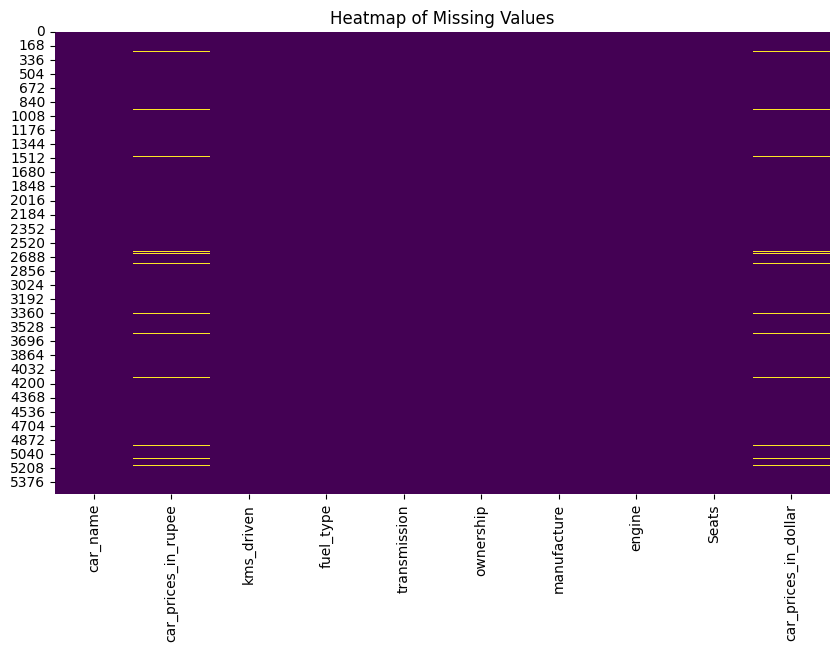

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [ ]:
# Checking for missing values
print(df.isnull().sum())

# Dropping rows with missing values
df.dropna(inplace=True)

car_name                  0
car_prices_in_rupee     123
kms_driven                0
fuel_type                 0
transmission              0
ownership                 0
manufacture               0
engine                    0
Seats                     0
car_prices_in_dollar    123
dtype: int64


## 2.3 Changing 'ownership' column to a numerical value:

This code checks and prints the unique values present in the 'ownership' column.

In [ ]:
#checking all the values for 'ownership' column
unique_ownership_types = df['ownership'].unique()

print("Unique Ownership Types:", unique_ownership_types)

Unique Ownership Types: ['1st Owner' '2nd Owner' '3rd Owner' '4th Owner' '5th Owner' '0th Owner']


This code renames the 'ownership' column to 'number_of_previous_owners' and converts its categorical values to numerical representation.

This helps in transforming the 'ownership' information into a numerical format ('number_of_previous_owners'), making it more suitable for analysis or machine learning models that require numerical inputs.

In [ ]:
#renaming ownership column to number of previous owners.
df.rename(columns = {'ownership':'number_of_previous_owners'},inplace=True)

df['number_of_previous_owners'] = df['number_of_previous_owners'].replace({'1st Owner' : 1, '2nd Owner' : 2, '3rd Owner' : 3, '4th Owner' : 4, '5th Owner' : 5, '0th Owner' : 0}).astype(int)

In [ ]:
#making sure all values have changed.
unique_ownership_types = df['number_of_previous_owners'].unique()

print("Unique Ownership Types:", unique_ownership_types)

Unique Ownership Types: [1 2 3 4 5 0]


The code above inspect and prints the unique values in the 'number_of_previous_owners' column to verify the numerical transformation.

## 2.3 Removing Outliers (standard deviation > 3):

This code checks and removes outliers from car_prices_in_dollar column.

In [ ]:
# Importing necessary libraries
import pandas as pd
from scipy.stats import zscore


# Calculate z-scores
z_scores = zscore(df['car_prices_in_dollar'])

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Create a boolean mask indicating outliers
outliers_mask = (z_scores > threshold) | (z_scores < -threshold)

# Remove outliers from the DataFrame
df = df[~outliers_mask]

# Display information about removed outliers
print(f"Number of car_prices_in_dollar outliers removed: {sum(outliers_mask)}")

# Optionally, you can reset the index of the new DataFrame
df.reset_index(drop=True, inplace=True)


Number of car_prices_in_dollar outliers removed: 102


In [ ]:
df.sample(5)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,number_of_previous_owners,manufacture,engine,Seats,car_prices_in_dollar
651,MG Hector Sharp DCT,1595000.0,28000,Petrol,Automatic,1,2019,1497,5,19247.013394
1935,Mahindra XUV500 W8 FWD,669000.0,74000,Diesel,Manual,1,2012,1061,5,8072.885242
3516,Maruti Wagon R LXI,385000.0,50000,Petrol,Manual,2,2019,1197,5,4645.830819
57,Jeep Compass 1.4 Sport,1400000.0,50000,Petrol,Manual,1,2018,1368,5,16893.930252
3201,Maruti Swift VDI BSIV W ABS,235000.0,100000,Diesel,Manual,3,2010,1086,7,2835.766864


The code `df.sample(5)` displays a random samples of 5 rows from the dataset following the data transformation that has been done earlier.

# 2.4 Getting the top 5 most common second hand cars in india and getting rid of the rest:

Sub dataset with only Swift, Alto, City, i20 Wagon R, and Dzire:

In [ ]:
# checking if car_name contains Swift, Alto, City, i20 Wagon R, and Dzire

sub_df = df[df['car_name'].str.contains('Swift|Alto|City|i20|Wagon R|Dzire')]


Thie above code creates a new DataFrame, `sub_df`, which includes rows where the 'car_name' column contains any of the specified car models: 'Swift', 'Alto', 'City', 'i20', 'Wagon R', or 'Dzire'.

This will be useful for filtering and analyzing data specific to these selected car models.

# Simplifying the names:

In [ ]:
# if car name contains Swift, Alto, City, i20 Wagon R, and Dzire, then raplace with the short name

def replace_car_name(name):
    if 'Maruti Swift' in name:
        return 'Swift'
    elif 'Maruti Alto' in name:
        return 'Alto'
    elif 'Honda City' in name:
        return 'City'
    elif 'Hyundai i20' in name:
        return 'i20'
    elif 'Maruti Wagon R' in name:
        return 'Wagon R'

sub_df['car_name'] = sub_df['car_name'].apply(replace_car_name)

<ipython-input-13-6614763733d9>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['car_name'] = sub_df['car_name'].apply(replace_car_name)


The above code defines a function, `replace_car_name`, and applies it to the 'car_name' column in the previously created subset DataFrame (`sub_df`). The function is designed to replace specific car model names with their short names.

This transformation simplifies the 'car_name' column by replacing specific model names with shorter versions.

Having a quick peek at data:

In [ ]:
sub_df.sample(10)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,number_of_previous_owners,manufacture,engine,Seats,car_prices_in_dollar
108,i20,650000.0,60000,Petrol,Manual,1,2017,1197,5,7843.610474
5232,i20,370000.0,65000,Petrol,Manual,1,2013,1968,5,4464.824424
784,City,945000.0,27914,Petrol,Automatic,1,2017,998,5,11403.402920
2117,Wagon R,525000.0,22000,Petrol,Automatic,1,2018,1498,5,6335.223845
5213,i20,200000.0,80000,Diesel,Manual,3,2011,1995,5,2413.418607
3087,City,644000.0,42189,Petrol,Manual,1,2017,1086,5,7771.207916
4923,Alto,275000.0,22999,Petrol,Manual,1,2017,1199,5,3318.450585
1327,Alto,351000.0,47133,Petrol,Manual,1,2018,1197,5,4235.549656
882,i20,700000.0,5000,Petrol,Manual,1,2021,1396,5,8446.965126
2013,Wagon R,105000.0,90000,Petrol,Manual,2,2007,1196,5,1267.044769


## 3. Exploratory Data Analysis (EDA)

<Axes: title={'center': 'car_prices_in_dollar'}, xlabel='car_name'>

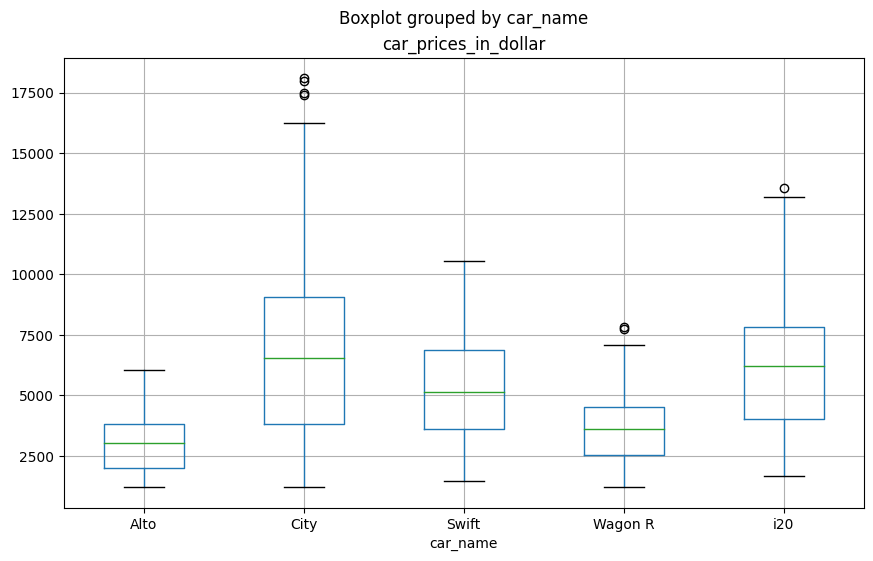

In [ ]:
# box plot for car name and car price

sub_df.boxplot(column='car_prices_in_dollar', by='car_name', figsize=(10, 6), vert=True)

This code will produce a box plot where each box represents the distribution of car prices for a specific car model. The x-axis will have the different car models ('Swift', 'Alto', 'City', 'i20', 'Wagon R'), and the y-axis will represent the car prices in dollars.

* TREND:
 - City has the highest mean price and Wagon has the lowest mean price.
 - Alto, i20 and Swift have skewness in distribution.
 - Alto and Wagon R have lesser inter-quartile range or spread.

<Axes: title={'center': 'Honda City'}, xlabel='kms_driven', ylabel='car_prices_in_dollar'>

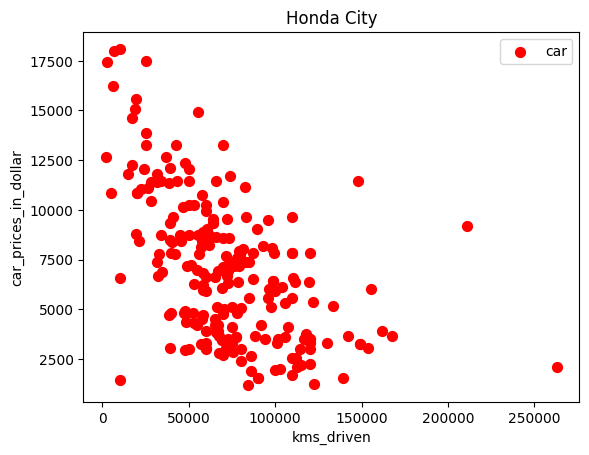

In [ ]:
# plot the correlation between kms_driven and car_prices_numeric for City

sub_df[sub_df['car_name'] == 'City'].plot(kind='scatter', x='kms_driven', y='car_prices_in_dollar', title='Honda City', color='red', marker='o', s=50, label='car')

The above code creates a scatter plot to visualize the correlation between 'kms_driven' and 'car_prices_in_dollar' specifically for the 'City' car model in the modified subset DataFrame (`sub_df`).

In this scatter plot:
- The x-axis represents the 'kms_driven' (kilometers driven) for Honda City.
- The y-axis represents the 'car_prices_in_dollar' for Honda City.
- Each point on the plot represents a data entry for the Honda City model.

The color is set to red, the marker style is 'o' (circle), and the size of the marker is specified as 50. The title of the plot is set as 'Honda City', and there's a legend label indicating the points represent cars.

* TREND:
 - Negative almost linear correlation.

<Axes: title={'center': 'Maruti Alto'}, xlabel='kms_driven', ylabel='car_prices_in_dollar'>

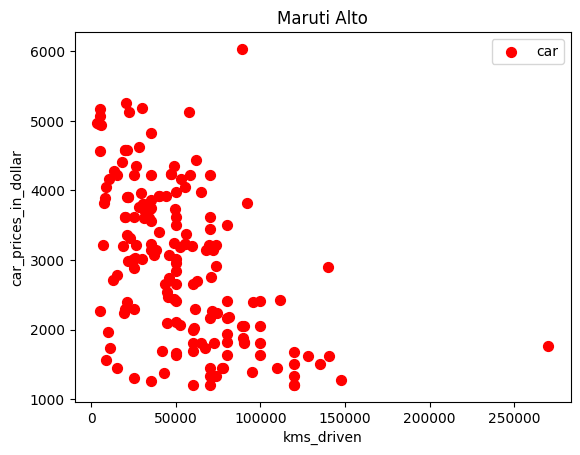

In [ ]:
sub_df[sub_df['car_name'] == 'Alto'].plot(kind='scatter', x='kms_driven', y='car_prices_in_dollar', title='Maruti Alto', color='red', marker='o', s=50, label='car')

The above code creates a scatter plot to visualize the correlation between 'kms_driven' and 'car_prices_in_dollar' specifically for the 'Alto' car model in the modified subset DataFrame (`sub_df`).

In this scatter plot:
- The x-axis represents the 'kms_driven' (kilometers driven) for Maruti Alto.
- The y-axis represents the 'car_prices_in_dollar' Maruti Alto.
- Each point on the plot represents a data entry for the Maruti Alto model.

The color is set to red, the marker style is 'o' (circle), and the size of the marker is specified as 50. The title of the plot is set as 'Maruti Alto', and there's a legend label indicating the points represent cars.

* TREND:
 - Weaker almost non-linear negative correlation.

<Axes: title={'center': 'Hyundai i20'}, xlabel='kms_driven', ylabel='car_prices_in_dollar'>

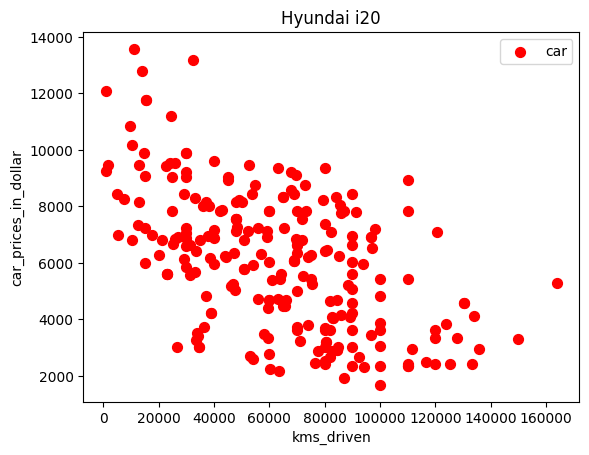

In [ ]:
sub_df[sub_df['car_name'] == 'i20'].plot(kind='scatter', x='kms_driven', y='car_prices_in_dollar', title='Hyundai i20', color='red', marker='o', s=50, label='car')

The above code creates a scatter plot to visualize the correlation between 'kms_driven' and 'car_prices_in_dollar' specifically for the 'i20' car model in the modified subset DataFrame (`sub_df`).

In this scatter plot:
- The x-axis represents the 'kms_driven' (kilometers driven) for Hyundai i20.
- The y-axis represents the 'car_prices_in_dollar' for Hyundai i20.
- Each point on the plot represents a data entry for the Hyundai i20 model.

The color is set to red, the marker style is 'o' (circle), and the size of the marker is specified as 50. The title of the plot is set as 'Hyundai i20', and there's a legend label indicating the points represent cars.

* TREND:
 - very weak non-linear negative correlation.

<Axes: title={'center': 'Maruti Swift'}, xlabel='kms_driven', ylabel='car_prices_in_dollar'>

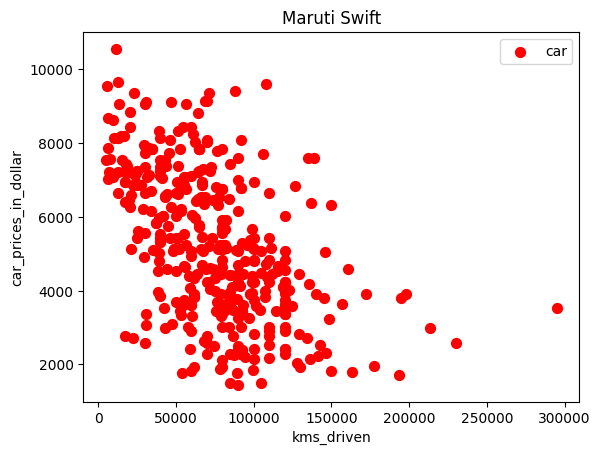

In [ ]:
sub_df[sub_df['car_name'] == 'Swift'].plot(kind='scatter', x='kms_driven', y='car_prices_in_dollar', title='Maruti Swift', color='red', marker='o', s=50, label='car')

The above code creates a scatter plot to visualize the correlation between 'kms_driven' and 'car_prices_in_dollar' specifically for the 'Swift' car model in the modified subset DataFrame (`sub_df`).

In this scatter plot:
- The x-axis represents the 'kms_driven' (kilometers driven) for Maruti Swift.
- The y-axis represents the 'car_prices_in_dollar' for Maruti Swift.
- Each point on the plot represents a data entry for the Maruti Swift model.

The color is set to red, the marker style is 'o' (circle), and the size of the marker is specified as 50. The title of the plot is set as 'Maruti Swift', and there's a legend label indicating the points represent cars.

* TREND:
 - stronger linear negative correlation.

<Axes: title={'center': 'Maruti Wagon R'}, xlabel='kms_driven', ylabel='car_prices_in_dollar'>

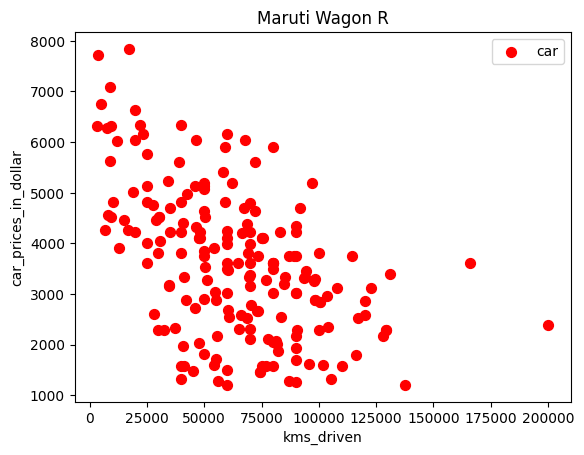

In [ ]:
sub_df[sub_df['car_name'] == 'Wagon R'].plot(kind='scatter', x='kms_driven', y='car_prices_in_dollar', title='Maruti Wagon R', color='red', marker='o', s=50, label='car')

The above code creates a scatter plot to visualize the correlation between 'kms_driven' and 'car_prices_in_dollar' specifically for the 'Wagon R' car model in the modified subset DataFrame (`sub_df`).

In this scatter plot:
- The x-axis represents the 'kms_driven' (kilometers driven) for Maruti Wagon R.
- The y-axis represents the 'car_prices_in_dollar' for Maruti Wagon R.
- Each point on the plot represents a data entry for the Maruti Wagon R model.

The color is set to red, the marker style is 'o' (circle), and the size of the marker is specified as 50. The title of the plot is set as 'Maruti Wagon R', and there's a legend label indicating the points represent cars.

* TREND:
 - weaker almost non-linear negative correlation.

Checking if manufacture year has an impact on the price:

<Axes: title={'center': 'Year vs. Price'}, xlabel='manufacture', ylabel='car_prices_in_dollar'>

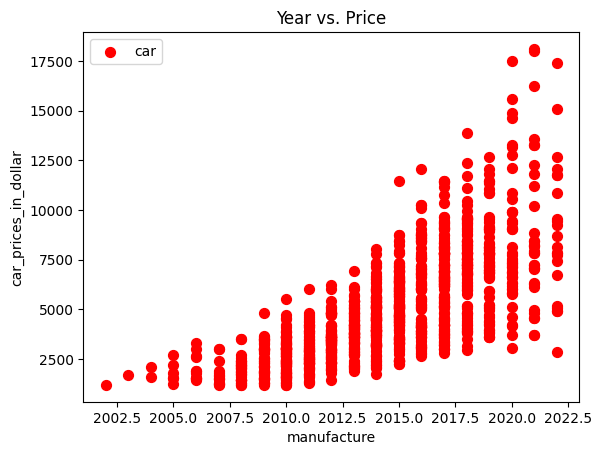

In [ ]:
sub_df.plot(kind='scatter', x='manufacture', y='car_prices_in_dollar', title='Year vs. Price', color='red', marker='o', s=50, label='car')

The above code creates a scatter plot to visualize the correlation between 'manufacture' and 'car_prices_in_dollar' in the modified subset DataFrame (`sub_df`).

In this scatter plot:
- The x-axis represents the 'manufacture' (year of manufacture) for cars in the subset DataFrame.
- The y-axis represents the 'car_prices_in_dollar' for cars in the subset DataFrame.
- Each point on the plot represents a data entry for the cars in the subset DataFrame.

The color is set to red, the marker style is 'o' (circle), and the size of the marker is specified as 50. The title of the plot is set as 'Year vs. Price', and there's a legend label indicating the points represent cars.

* TREND:
 - strong linear positive correlation.

Checking if there is any relation between number of previous owneres compared to the price given in the market:

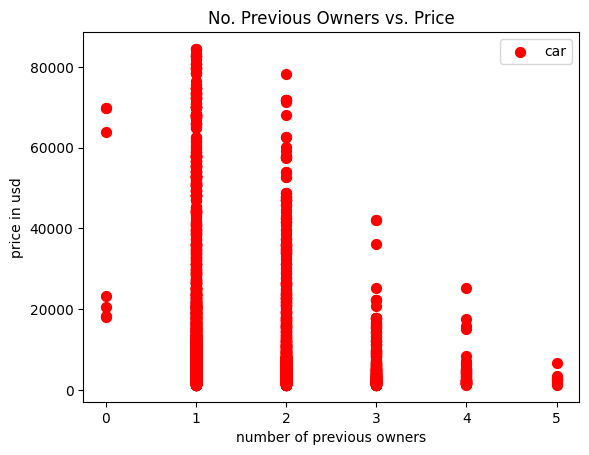

In [ ]:
df.plot(kind='scatter', x='number_of_previous_owners', y='car_prices_in_dollar', title='No. Previous Owners vs. Price', color='red', marker='o', s=50, label='car')

plt.xlabel('number of previous owners')
plt.ylabel('price in usd')
plt.legend()

plt.show()

The above code creates a scatter plot to visualize the correlation between 'number_of_previous_owners' (number of previous owners) and 'car_prices_in_dollar' (price in usd) in the modified subset DataFrame (`sub_df`).

In this scatter plot:
- The x-axis represents the **number of previous owners** for cars in the subset DataFrame.
- The y-axis represents the **price in usd** for cars in the subset DataFrame.
- Each point on the plot represents a data entry for the cars in the subset DataFrame.

The color is set to red, the marker style is 'o' (circle), and the size of the marker is specified as 50. The title of the plot is set as 'No. Previous Owners vs. Price', and there's a legend label indicating the points represent cars.


* TREND:
 - strong linear negative correlation.

# 4. Algorithm Training & Testing (Regression):



**Why did we choose linear regression?**

a. First, yes because our mission is to predict the price(dependent variable) for the top selling cars in the used market based on the features(independent variable).

b. Linear regression is a straightforward and understandable method. The link between the dependent and independent variables is expressed by a linear equation, making the coefficients easy to read.

c. Once trained, the model can be utilized to make predictions. Linear regression is a straightforward approach to create predictions based on fresh or unknown data.

d. Linear regression requires fewer assumptions than some other statistical procedures. The important assumptions are linearity, error independence, homoscedasticity (constant error variance), and error normalcy. Which generally we already assume that there is linear relation between the price and the features.

e. Linear regression can be used as a baseline model to compare with more complex models. If a linear model performs well, it may indicate that the relationship between variables is quite straightforward. So if the result is not so good, we must use other complex model.

# Method

Creating a subset as to not alter the main set:


In [ ]:
df_reg = sub_df.copy()

In [ ]:
df_reg.head(5)

,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,number_of_previous_owners,manufacture,engine,Seats,car_prices_in_dollar
8,City,699000.0,21429,Petrol,Automatic,1,2015,1497,5,8434.898033
11,City,543000.0,110284,Petrol,Automatic,1,2014,1497,5,6552.431519
14,City,1003000.0,38906,Petrol,Manual,1,2020,1498,5,12103.294316
16,i20,667000.0,85672,Diesel,Manual,1,2017,1396,5,8048.751056
20,Swift,434000.0,56568,Petrol,Manual,1,2014,1197,5,5237.118378


Dropping columns unneccessary to train our regression model:

In [ ]:
df_reg.drop(
    [
        "car_prices_in_rupee",
        #"Seats",
        #"transmission"
    ],
    axis=1,
    inplace=True,
)

In [ ]:
df_reg.head(5)

,car_name,kms_driven,fuel_type,transmission,number_of_previous_owners,manufacture,engine,Seats,car_prices_in_dollar
8,City,21429,Petrol,Automatic,1,2015,1497,5,8434.898033
11,City,110284,Petrol,Automatic,1,2014,1497,5,6552.431519
14,City,38906,Petrol,Manual,1,2020,1498,5,12103.294316
16,i20,85672,Diesel,Manual,1,2017,1396,5,8048.751056
20,Swift,56568,Petrol,Manual,1,2014,1197,5,5237.118378


One Hot Encoding:

In [ ]:
df_reg_ohe = pd.get_dummies(df_reg, columns=['car_name', 'fuel_type', 'transmission'], prefix=['car_name', 'fuel_type', 'transmission'], drop_first=False)

In [ ]:
X, y = df_reg_ohe.drop('car_prices_in_dollar', axis=1), df_reg_ohe['car_prices_in_dollar']

Splitting the dataset into training and testing sets:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import joblib


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Initialize MinMaxScaler
scaler = StandardScaler()

# Apply Scaling to the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the number of features
print(f"Number of features: {X_train_scaled.shape[1]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of features: {X_train.shape[1]}")
print("Original features:", X.columns)
print("Scaled features:", X_train.columns)

Number of features: 16
Number of features: 16
Number of features: 16
Original features: Index(['kms_driven', 'number_of_previous_owners', 'manufacture', 'engine',
       'Seats', 'car_name_Alto', 'car_name_City', 'car_name_Swift',
       'car_name_Wagon R', 'car_name_i20', 'fuel_type_Cng', 'fuel_type_Diesel',
       'fuel_type_Lpg', 'fuel_type_Petrol', 'transmission_Automatic',
       'transmission_Manual'],
      dtype='object')
Scaled features: Index(['kms_driven', 'number_of_previous_owners', 'manufacture', 'engine',
       'Seats', 'car_name_Alto', 'car_name_City', 'car_name_Swift',
       'car_name_Wagon R', 'car_name_i20', 'fuel_type_Cng', 'fuel_type_Diesel',
       'fuel_type_Lpg', 'fuel_type_Petrol', 'transmission_Automatic',
       'transmission_Manual'],
      dtype='object')


Training the model:

In [ ]:
# Defining models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=175, max_depth=10, min_samples_leaf=5, min_samples_split=5, random_state=42),
    #"DecisionTreeRegressor": DecisionTreeRegressor(),
    "xgb": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    #"knn":  KNeighborsRegressor(n_neighbors=5),
    #"svr": SVR(kernel='linear', C=1.0),
    #"LassoRegression": Lasso(alpha=0.1, max_iter=10000),
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, random_state=42),
    "BaggingRegressor": BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
}
scores = {}

# Creating a scorer
scorer = make_scorer(r2_score, greater_is_better=True)


# For each model name and instance in the models dictionary
for model_name, model in models.items():
    # Train the model using the training sets
      model.fit(X_train_scaled , y_train)

    # Save the trained model
      joblib.dump(model, f'{model_name}_model.joblib')

    # Make predictions using the testing set
      y_pred = model.predict(X_test_scaled)

      # calculate the root mean squared error
      rmse = mean_squared_error(y_test, y_pred, squared=False)
      print(f"{model_name} mean squared error: {rmse}")



LinearRegression mean squared error: 1129.4483952738608
RandomForestRegressor mean squared error: 917.5663943454438
xgb mean squared error: 909.0806585504296
GradientBoostingRegressor mean squared error: 808.7327012837212
BaggingRegressor mean squared error: 959.8775929179792


Testing the model.

As we can see in figure below, the average price is **5129.78**, it's much more than **800** to **1200**. It suggests that, on average, our model's predictions are relatively close to the true values.

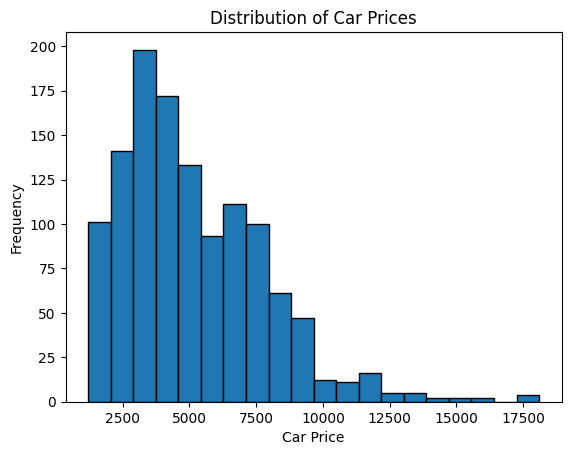

The average car price is: 5129.78


In [ ]:
car_prices = df_reg_ohe['car_prices_in_dollar']

# Plotting a histogram
plt.hist(car_prices, bins=20, edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.show()

average_car_price = np.mean(car_prices)

print(f"The average car price is: {average_car_price:.2f}")

In [ ]:
for model_name, model in models.items():

    # Make predictions using the testing set
      y_pred = model.predict(X_test_scaled)

      # calculate the mean absolute error
      mae = mean_absolute_error(y_test, y_pred)
      print(f"{model_name} mean absolute error: {mae}")


LinearRegression mean absolute error: 818.462917729117
RandomForestRegressor mean absolute error: 690.1233350721727
xgb mean absolute error: 662.7876245343928
GradientBoostingRegressor mean absolute error: 620.4775997164787
BaggingRegressor mean absolute error: 716.0430414155335


The car prices are wide range so mean absolute error of **600** to **800** is reasonable

In [ ]:
# Create a dictionary to store predictions for each model
all_predictions = {}

for model_name, model in models.items():
    # Make predictions using the testing set
    y_pred = model.predict(X_test_scaled)

    # Store the predictions in the dictionary
    all_predictions[model_name] = y_pred

    # Calculate the R-squared score
    r2 = r2_score(y_test, y_pred)

    # Print the R-squared score for each model
    print(f"{model_name}: {r2}")

# Calculate the overall R-squared score using all predictions
overall_predictions = np.mean(list(all_predictions.values()), axis=0)
overall_r2 = r2_score(y_test, overall_predictions)
print(f"Overall R-squared score: {overall_r2}")


#
#LinearRegression: 0.7561609759923351
#RandomForestRegressor: 0.8423666192374144
#DecisionTreeRegressor: 0.7590719712100966
#Overall R-squared score: 0.7590719712100966

LinearRegression: 0.8207532475816638
RandomForestRegressor: 0.8816976126035776
xgb: 0.8838756365824503
GradientBoostingRegressor: 0.9080972474507095
BaggingRegressor: 0.8705356432093535
Overall R-squared score: 0.9051700780343949


The numbers seem quite good. This suggests that this combined model is capturing a substantial portion of the variability in car prices. The closer R-squared is to 1, the better the model is at explaining the variance in the target variable.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, r2_score

# Define the GradientBoostingRegressor model
gbr_model = GradientBoostingRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid,
                           scoring='r2', cv=5, verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_gbr_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_gbr = best_gbr_model.predict(X_test_scaled)

# Calculate R-squared score for the best model
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)
print("R-squared score for the best GBR model:", r2_best_gbr)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8928084463135173
R-squared score for the best GBR model: 0.9123001053143402


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Assuming X_train_scaled is already defined and scaled using StandardScaler

# Define the RandomForestRegressor model
rf_model = RandomForestRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 175],
    'max_depth': [None, 10, 40],
    'min_samples_split': [2, 5, 20],
    'min_samples_leaf': [2, 4, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='r2', cv=5, verbose=4, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Scale the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Evaluate the best model on the test set
y_pred_best = best_rf_model.predict(X_test_scaled)

# Calculate R-squared score for the best model
r2_best = r2_score(y_test, y_pred_best)
print("R-squared score for the best model:", r2_best)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8839201454166001
R-squared score for the best model: 0.8843855695482843


We try to check use other regression models to check which is more accurate. And we use a 5 fold cross validation to get a more realistic result.

In [ ]:
# Define models
models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=175, max_depth=10, min_samples_leaf=5, min_samples_split=5, random_state=42),
    #"DecisionTreeRegressor": DecisionTreeRegressor(),
    "xgb": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    #"knn":  KNeighborsRegressor(n_neighbors=5),
    #"svr": SVR(kernel='linear', C=1.0),
    #"LassoRegression": Lasso(alpha=0.1, max_iter=10000),
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, random_state=42),
    "BaggingRegressor": BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
}
# Initialize an empty dictionary to store cross-validation scores
scores = {}

# Create a scorer for R-squared
scorer = make_scorer(r2_score, greater_is_better=True)

# For each model name and instance in the models dictionary
for model_name, model in models.items():
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring=scorer)

    # Calculate the mean of the cross-validation scores
    mean_cv_score = cv_scores.mean()

    # Store the mean cross-validation score in the scores dictionary
    scores[model_name] = mean_cv_score

# Calculate the overall R-squared score
overall_r2_score = np.mean(list(scores.values()))

# Print individual scores and overall score
for model_name, score in scores.items():
    print(f"{model_name}: {score}")

print(f"Overall R-squared score: {overall_r2_score}")


LinearRegression: 0.7824351076358445
RandomForestRegressor: 0.8602970406280109
xgb: 0.8533913175823328
GradientBoostingRegressor: 0.8773121735425577
BaggingRegressor: 0.8568172664537805
Overall R-squared score: 0.8460505811685053


The difference is pretty noticible after we used cross validation. GradientBoostingRegressor seems to be the best of all.

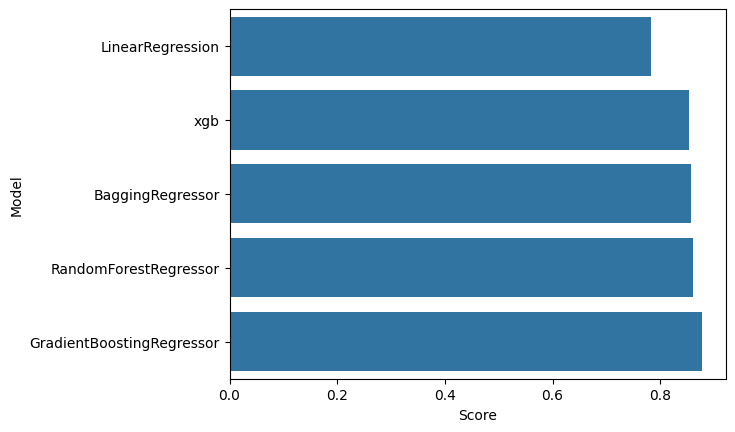

In [ ]:
# Create a list of (model_name, model_score)
model_scores = [(k, v) for k, v in scores.items()]

# Convert the list into a DataFrame
model_scores_df = pd.DataFrame(model_scores, columns=['Model', 'Score'])

# Sort the models by their scores
model_scores_df.sort_values(by='Score', inplace=True)

# Plot the scores as a bar plot
sns.barplot(x='Score', y='Model', data=model_scores_df)

# Show the plot
plt.show()



# 5. Experiments

#### Experiment 0: With Outliers
- **LinearRegression**: 0.804
- **RandomForestRegressor**: 0.868
- **DecisionTreeRegressor**: 0.706
- **Overall R-squared score**: 0.859

**Cross-Validation:**
- **LinearRegression**: 0.759
- **RandomForestRegressor**: 0.844
- **DecisionTreeRegressor**: 0.738
- **Overall R-squared score**: 0.781

*Results:*
- Models perform reasonably well, but there's room for improvement.
- RandomForestRegressor shows promising results.

#### Experiment 1: Outliers Removed
- **LinearRegression**: 0.820 ↑
- **RandomForestRegressor**: 0.880 ↑
- **DecisionTreeRegressor**: 0.800 ↑
- **Overall R-squared score**: 0.870 ↑

**Cross-Validation:**
- **LinearRegression**: 0.778
- **RandomForestRegressor**: 0.836
- **DecisionTreeRegressor**: 0.731
- **Overall R-squared score**: 0.782

*Results:*
- Removing outliers significantly improves performance across all models.
- RandomForestRegressor and DecisionTreeRegressor benefit the most.

#### Experiment 2: Min-Max Scaler
- **LinearRegression**: 0.820
- **RandomForestRegressor**: 0.878 ↑
- **DecisionTreeRegressor**: 0.795 ↑
- **Overall R-squared score**: 0.869

**Cross-Validation:**
- **LinearRegression**: 0.778
- **RandomForestRegressor**: 0.839 ↑
- **DecisionTreeRegressor**: 0.730
- **Overall R-squared score**: 0.782

*Results:*
- Min-Max Scaling has a limited impact on the overall score. Switched to Standard Scaler.

#### Experiment 3: Hyperparameter Tuning on RandomForestRegressor
- **Best Parameters**: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 100}
- **Best Score**: 0.870
- **R-squared score for the best model**: 0.886 ↑

*Results:*
- Significant improvement in RandomForestRegressor with hyperparameter tuning.
- The overall R-squared score sees a positive impact.

####Experiment 4: Including more models (XGBoost, SVR, GradientBoostingRegressor)


| Model                   | R^2 Score on Test Data | R^2 Score on Cross-Validation |
|-------------------------|------------------------|--------------------------------|
| LinearRegression        | 0.820                  | 0.778                          |
| RandomForestRegressor   | 0.877                  | 0.838                          |
| DecisionTreeRegressor (removed)  | 0.785                  | 0.728                          |
| XGBoost                  | 0.869 ↑                 | 0.818 ↑                          |
| GradientBoostingRegressor| 0.891 ↑                  | 0.857 ↑                          |
| BaggingRegressor | 0.873 ↑                 | 0.830 ↑                         |
| KNN (removed) | 0.718 ↓                 | -0.242 ↓↓                          |
| SVR (removed) | 0.763 ↓                 | 0.345 ↓↓                          |
| Lasso (removed) | 0.828                  | 0.793                           |
| ElasticNet Regression (removed) | 0.827                  | 0.789 ↓                         |
| Ridge (removed) | 0.817                  | 0.786 ↓  
| **Overall R-squared score** | **0.882 ↑**           | **0.808 ↑**                      |

*Note:*
- Arrows indicate the direction of change (↑ for increase, ↓ for decrease). Models marked as (removed) were excluded from the final experiment due to poor performance.

*Results:*
- Introduction of GradientBoostingRegressor significantly boosts the overall score.
- DecisionTreeRegressor improves slightly.
- Cross-validation sees a positive impact.

*Exception/challenges:*

- Adding SVR or KNN resulted in large errors and reduced the overall accuracy to 64% in cross-validation.
- SVR and KNN both gave 0 or negative R-squared scores in cross-validation but positive scores normally.

*Details on SVR and KNN Performance:*

- We initially observed a positive R-squared score for KNN and SVR; however, during 5-fold cross-validation, both models showed a negative R-squared score. Several factors contribute to this behavior:

  - Sensitivity to Data Distribution: KNN's performance heavily depends on the distribution of data. In each fold of cross-validation, the distribution of data points in the training set may not be representative of the distribution in the validation set, leading to suboptimal performance.

  - Local Structure vs. Global Structure: KNN focuses on the local structure of the data. In some cases, the local relationships learned during training might not generalize well to unseen data, especially when the validation set has a different local structure.

#### Experiment 5: Hyperparameter Tuning on GradientBoostingRegressor
- **Best Parameters**: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
- **Best Score**: 0.873
- **R-squared score for the best model**: 0.887 ↑

*Results:*
- Hyperparameter tuning on GradientBoostingRegressor results in further improvement.
- The overall R-squared score continues to rise.

#### Experiment 6: Additional Features and Encoding previously excluded

- **LinearRegression:** 0.821 ↑  
- **RandomForestRegressor:** 0.882 ↑  
- **XGBoost:** 0.884 ↑  
- **GradientBoostingRegressor:** 0.908 ↑  
- **BaggingRegressor:** 0.871 ↑  
- **Overall R-squared score:** 0.905 ↑  

**Cross-Validation:**
- **LinearRegression:** 0.782
- **RandomForestRegressor:** 0.860
- **XGBoost:** 0.853
- **GradientBoostingRegressor:** 0.877
- **BaggingRegressor:** 0.857
- **Overall R-squared score:** 0.846 ↑

**Results:**
- Addition of new features, such as the number of seats in the car, and hot encoding transmission types (automatic or manual) contributes to improved model performance.
- GradientBoostingRegressor stands out with the highest R-squared score, reaching 0.908.
- The overall R-squared score continues to show enhancement, indicating the effectiveness of introducing additional relevant features.

### Observations:
- Removing outliers seems to have a positive impact on model performance.
- Min-Max scaling doesn't show a significant impact on the overall R-squared score.
- Hyperparameter tuning on RandomForestRegressor improved its performance.
- Including more models (XGBoost, SVR, GradientBoostingRegressor) further increased the overall R-squared score.
- Hyperparameter tuning on GradientBoostingRegressor improved its performance even more.

### Analysis:
- Overall R-squared score increases across experiments, indicating model enhancement.
- A combination of removing outliers, proper scaling, and hyperparameter tuning contributes to better model performance.
- GradientBoostingRegressor appears to be a strong performer in this context.
- Cross-validation scores help assess the robustness of models to different data splits. Models that perform well on cross-validation are more likely to generalize better to unseen data.
- Continuous improvement across experiments demonstrates the effectiveness of each enhancement step.


# 6. Conclusion

## 1. Data Loading and Cleaning:

- Price values were converted to USD, Lakhs and Crores formats were handled, unnecessary columns were dropped and more
- NaN values were addressed in 'car_prices_in_rupee' and 'car_prices_in_dollar'.
- The 'ownership', 'engine' and 'seats" column was transformed into numerical values.
- The dataset was focused on the top 5 second-hand cars in India: Swift, Alto, City, i20 Wagon R, and Dzire.

## 2. Exploratory Data Analysis (EDA):

- The impact of manufacture year on prices was examined.
- The relationship between the number of previous owners and kms_travelled with car prices was explored to observe correlation strength and type.
- Box-and-whisker plots were utilised to find mean and spread

## 3. Algorithm Training & Testing (Regression):

- A subset was created to avoid altering the main set.
- Unnecessary columns were dropped, and one-hot encoding was applied.
- The dataset was split into training and testing sets.
- A machine learning regression models including linear regression were trained and tested, showing promising results.

## 4. Model Evaluation:

- The linear regression model's mean squared error was 1180.54, mean absolute error was 866.12, and R-squared score was 80.4%.
- The average car price was found to be 5129.78, suggesting the model's predictions are relatively close to true values.

## 5. Experiment:

 * The experiments demonstrate consistent model enhancement through iterative steps, including outlier removal, hyperparameter tuning, and introducing robust models like GradientBoostingRegressor. The overall R-squared score increased from 0.859 to 0.905, affirming the effectiveness of each improvement. Notably, GradientBoostingRegressor emerged as a strong performer, contributing to the significant boost in the overall model performance.

* ### Initial: Experiment 0

| Model                 | R^2 Score on Test Data | R^2 Score on 5-fold Cross-Validation |
|-----------------------|-------------------------|-------------------------------|
| LinearRegression      | 0.804                   | 0.759                         |
| RandomForestRegressor | 0.868                   | 0.844                         |
| DecisionTreeRegressor | 0.706                   | 0.738                         |
| Overall R-squared score| 0.859                   | 0.781                         |

* ### After all experiments: Experiment 6

| Model                   | R^2 Score on Test Data | R^2 Score on 5-fold Cross-Validation |
|-------------------------|------------------------|------------------------------------|
| LinearRegression        | 0.821                 | 0.782                              |
| RandomForestRegressor   | 0.882                 | 0.860                              |
| XGBoost                 | 0.884                 | 0.853                              |
| GradientBoostingRegressor| 0.908 ↑↑               | 0.877 ↑↑                              |
| BaggingRegressor        | 0.871                 | 0.857                              |
| Overall R-squared score  | 0.905 ↑                | 0.846 ↑  



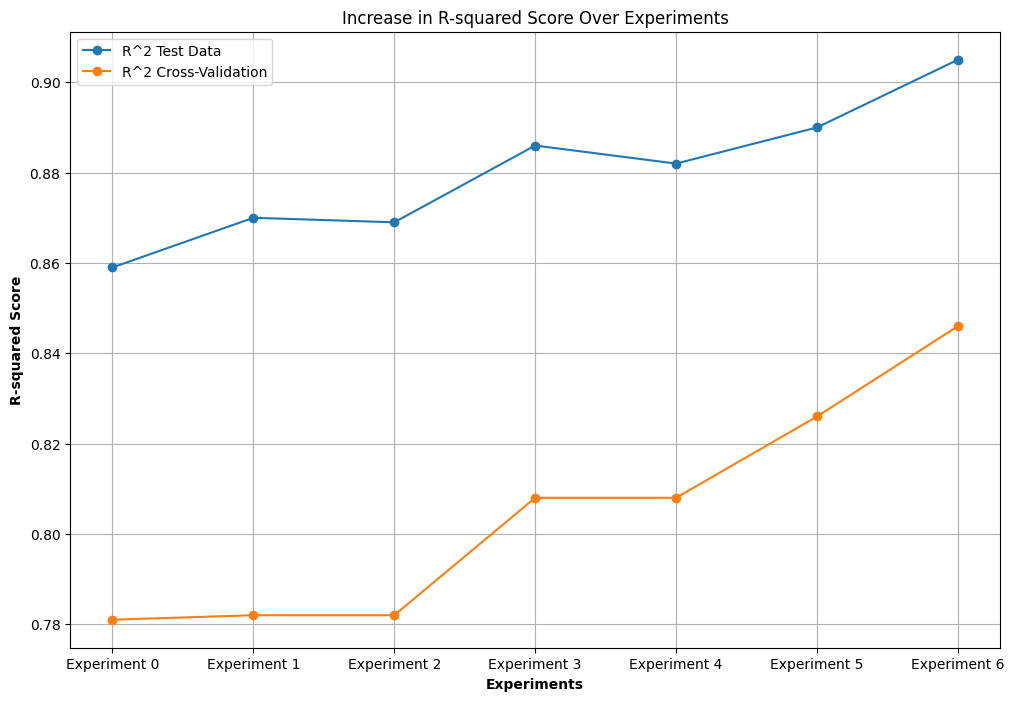

In [ ]:
# @title Plot showing Trend of model R^2 Score improvements
# Data
experiments = ['Experiment 0', 'Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4', 'Experiment 5', 'Experiment 6']
r2_test_overall = [0.859, 0.870, 0.869, 0.886, 0.882, 0.890, 0.905]
r2_cross_val_overall = [0.781, 0.782, 0.782, 0.808, 0.808, 0.826, 0.846]

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(experiments, r2_test_overall, marker='o', label='R^2 Test Data')
plt.plot(experiments, r2_cross_val_overall, marker='o', label='R^2 Cross-Validation')

plt.xlabel('Experiments', fontweight='bold')
plt.ylabel('R-squared Score', fontweight='bold')
plt.title('Increase in R-squared Score Over Experiments')
plt.legend()
plt.grid(True)
plt.show()


In conclusion, the application of linear regression on the car price dataset has provided a robust tool for predicting car prices in the Indian market. The thorough data cleaning and feature engineering, along with exploratory analysis, have contributed to a reliable model. The model's performance metrics indicate its effectiveness in capturing variability in car prices. This approach empowers consumers with valuable insights for making informed decisions in the complex landscape of car purchases.

In [ ]:
# @title 7. CLI User Interface to utilise our machine learning model to predict car prices
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

def print_colorful_menu():
    print("\033[1;33m***************************************************************************************\033[0m")
    print("\033[1;33m*  Funteck's CarCash AI - Your Old Car Selling Price Predictor : CLI User Interface   *\033[0m")
    print("\033[1;33m***************************************************************************************\033[0m")
    print("\033[1;32mChoose input method:\033[0m")
    print("\033[1;32m1. Single-line input (Provide all values comma-separated in a single line)\033[0m")
    print("\033[1;32m2. One-by-one input\033[0m")

def get_user_input():
    choice = int(input("Enter your choice (1 or 2): "))

    if choice == 1:
        # Single-line input
        user_input = list(map(float, input('Enter values for all 16 features comma-separated: ').split(',')))
    else:
        # One-by-one input
        user_input = {}
        user_input['kms_driven'] = float(input('Enter Kilometers Driven: '))
        user_input['number_of_previous_owners'] = int(input('Enter Number of Previous Owners: '))
        user_input['manufacture'] = int(input('Enter Manufacture Year: '))
        user_input['engine'] = float(input('Enter Engine Capacity: '))
        user_input['Seats'] = int(input('Enter Number of Seats: '))
        user_input['car_name_Alto'] = int(input('Enter 1 if car_name is Alto, 0 otherwise: '))
        user_input['car_name_City'] = int(input('Enter 1 if car_name is City, 0 otherwise: '))
        user_input['car_name_Swift'] = int(input('Enter 1 if car_name is Swift, 0 otherwise: '))
        user_input['car_name_Wagon R'] = int(input('Enter 1 if car_name is Wagon R, 0 otherwise: '))
        user_input['car_name_i20'] = int(input('Enter 1 if car_name is i20, 0 otherwise: '))
        user_input['fuel_type_Cng'] = int(input('Enter 1 if fuel_type is Cng, 0 otherwise: '))
        user_input['fuel_type_Diesel'] = int(input('Enter 1 if fuel_type is Diesel, 0 otherwise: '))
        user_input['fuel_type_Lpg'] = int(input('Enter 1 if fuel_type is Lpg, 0 otherwise: '))
        user_input['fuel_type_Petrol'] = int(input('Enter 1 if fuel_type is Petrol, 0 otherwise: '))
        user_input['transmission_Automatic'] = int(input('Enter 1 if transmission is Automatic, 0 otherwise: '))
        user_input['transmission_Manual'] = int(input('Enter 1 if transmission is Manual, 0 otherwise: '))

    return user_input

def main():
    # Assuming X and y are your features and target variable
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # Initialize StandardScaler
    scaler = StandardScaler()

    # Apply Standard Scaling to the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize Gradient Boosting Regression model
    model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=5, random_state=42)

    # Train the model using the training sets
    model.fit(X_train_scaled, y_train)

    # Display colorful menu
    print_colorful_menu()

    # Get user input
    user_input = get_user_input()

    # Create a DataFrame from the user input with the correct column names
    user_df = pd.DataFrame([user_input], columns=X.columns)

    # Feature preprocessing (scaling)
    user_df_scaled = scaler.transform(user_df)

    # Get the predicted car price
    predicted_price = model.predict(user_df_scaled)[0]

    # Print the predicted price
    print(f'\033[1;33mPredicted Car Price: ${predicted_price:.2f}\033[0m')

if __name__ == "__main__":
    main()

#Sample Input
# 1
# 50000, 1, 2024, 3497, 5, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0 SP = 14700
# 110284, 1, 2014, 1497, 5, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0 SP = 6347


***************************************************************************************
*  Funteck's CarCash AI - Your Old Car Selling Price Predictor : CLI User Interface   *
***************************************************************************************
Choose input method:
1. Single-line input (Provide all values comma-separated in a single line)
2. One-by-one input
Enter your choice (1 or 2): 2
Enter Kilometers Driven: 150000
Enter Number of Previous Owners: 5
Enter Manufacture Year: 2022
Enter Engine Capacity: 3500
Enter Number of Seats: 5
Enter 1 if car_name is Alto, 0 otherwise: 0
Enter 1 if car_name is City, 0 otherwise: 0
Enter 1 if car_name is Swift, 0 otherwise: 0
Enter 1 if car_name is Wagon R, 0 otherwise: 1
Enter 1 if car_name is i20, 0 otherwise: 0
Enter 1 if fuel_type is Cng, 0 otherwise: 1
Enter 1 if fuel_type is Diesel, 0 otherwise: 0
Enter 1 if fuel_type is Lpg, 0 otherwise: 0
Enter 1 if fuel_type is Petrol, 0 otherwise: 0
Enter 1 if transmission is Automatic